In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

In [4]:
df = pd.read_csv("datasets/Stock_bond.csv")
df.head()

Date  GM_Volume  GM_AC  F_Volume  F_AC  UTX_Volume  UTX_AC  CAT_Volume  \
0  2-Jan-87     922200  11.45   2540100  2.31     1130400    3.66     1218400   
1  5-Jan-87    2100000  11.73   8670000  2.40     3032800    3.70     1752000   
2  6-Jan-87    2720000  11.77   6992000  2.43     6614400    3.74     1206400   
3  7-Jan-87    2000400  11.83   7621200  2.53     4233600    3.78     2188000   
4  8-Jan-87    2460000  11.66   5807500  2.51     3816800    3.82     2195200   

   CAT_AC  MRK_Volume       ...        XOM_Volume  XOM_AC  S&P_AC  S&P_Volume  \
0    3.38    14454000       ...           3611200    4.52  246.45    91880000   
1    3.48    11538000       ...           9040000    4.63  252.19   181900000   
2    3.48    14279400       ...           7931200    4.62  252.78   189300000   
3    3.45    13003200       ...           5351200    4.61  255.33   190900000   
4    3.44    16320600       ...           9680000    4.61  257.28   194500000   

   1 year Treasury Constant Maturity Rate  \
0                                    5.86   
1                                    5.85   
2                                    5.85   
3                                    5.78   
4                                    5.78   

   3-Year Treasury Constant Maturity Rate  \
0                                    6.48   
1                                    6.41   
2                                    6.42   
3                                    6.37   
4                                    6.36   

   10 year Treasury Constant Maturity Rate  \
0                                     7.18   
1                                     7.08   
2                                     7.08   
3                                     7.05   
4                                     7.04   

   30 year Treasury Constant Maturity Rate  Aaa Bond Yield  Baa Bond Yield  
0                                     7.44            8.49            9.97  
1                                     7.35            8.44            9.90  
2                                     7.36            8.41            9.86  
3                                     7.33            8.40            9.82  
4                                     7.31            8.37            9.76  

[5 rows x 29 columns]

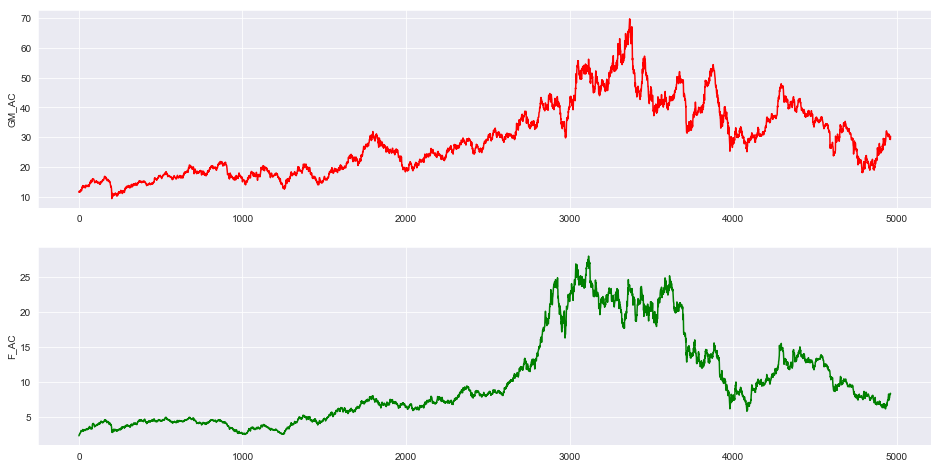

In [5]:
fig, ax = plt.subplots(2)
sns.lineplot(df.index,'GM_AC', data=df, ax=ax[0], color='red')
sns.lineplot(df.index,'F_AC', data=df, ax=ax[1], color='green')

In [6]:
data = [
    go.Scatter(
        x=df.Date,
        y=df['GM_AC'],
        mode='lines',
        marker = dict(
            color='red',
        ),
        name='GM_AC'
    ),
    go.Scatter(
        x=df.Date,
        y=df['F_AC'],
        mode='lines',
        marker=dict(
            color='green'
        ),
        name='F_AC'
    )
]
layout = go.Layout(
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Return'
    )
)
fig = go.Figure(data,layout)
iplot(fig, filename='index')

In [7]:
GMReturn = (df['GM_AC'][1:-1].values/df['GM_AC'][0:-2].values) - 1
FReturn = (df['F_AC'][1:-1].values/df['F_AC'][0:-2].values) - 1

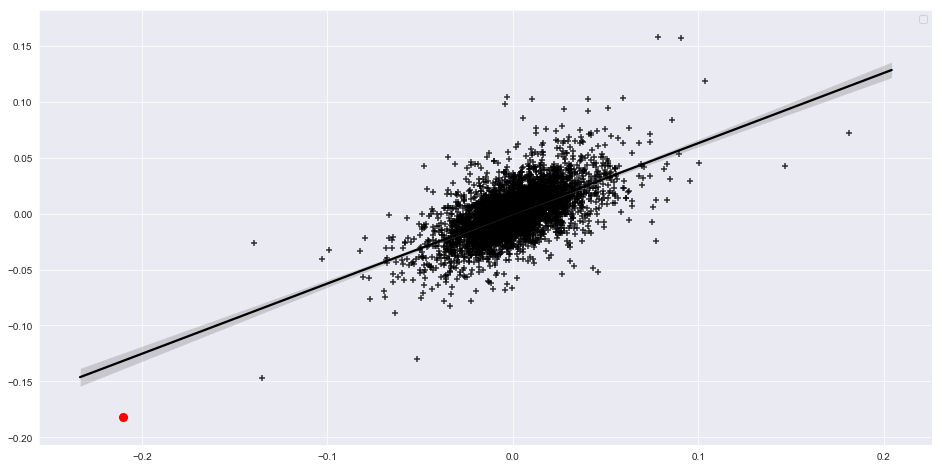

In [8]:
fig, ax = plt.subplots()
sns.regplot(GMReturn,FReturn, ax=ax, color='black', marker='+')
sns.scatterplot([min(GMReturn)], [min(FReturn)], ax=ax, color='red', s=100)
ax.legend("")

In [21]:
data = [
    go.Scatter(
        x=GMReturn,
        y=FReturn,
        mode='markers',
        marker=dict(
            color='black'
        )
    )
]
iplot(data,filename='correlation')

In [10]:
data = [
    go.Histogram2dContour(
        x=GMReturn,
        y=FReturn,
        colorscale='Blues',
        reversescale=True,
        xaxis='x',
        yaxis='y'
    ),
]
layout = go.Layout(
    autosize=True,
    xaxis = dict(
        zeroline = False,
        range=[-0.05,0.05],
        #domain = [0,0.85],
    ),
    yaxis = dict(
        zeroline = False,
        range=[-0.05,0.05],
        #domain = [0,0.85],
    ),
)
fig = go.Figure(data, layout)
iplot(fig,filename='histogram2D')

## Question 1: 
- Les deux variables sont corrélées
- les outliers de GMReturn sont ceux de FReturn

In [11]:
GMReturn_log = np.log(GMReturn+1)
FReturn_log = np.log(FReturn+1)

Text(0, 0.5, 'FReturn_log')

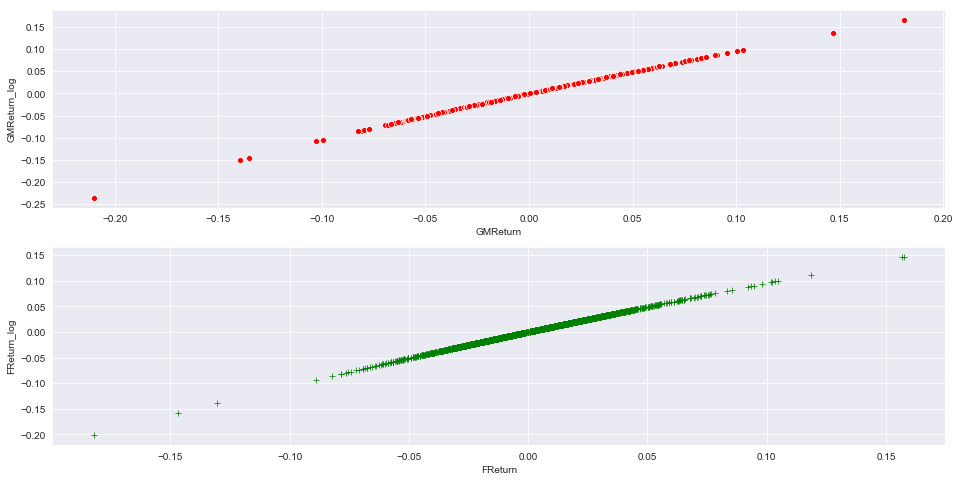

In [12]:
fig, ax = plt.subplots(2)
sns.scatterplot(GMReturn, GMReturn_log, ax=ax[0], color='red', marker="o")
ax[0].set_xlabel("GMReturn")
ax[0].set_ylabel("GMReturn_log")
sns.scatterplot(FReturn, FReturn_log, ax=ax[1], color='green', marker='+')
ax[1].set_xlabel("FReturn")
ax[1].set_ylabel("FReturn_log")

In [13]:
data = [
    go.Scatter(
        x = GMReturn,
        y = GMReturn_log,
        xaxis='x1',
        yaxis='y1',
        mode='markers',
        marker=dict(color='rgba(256,0,0,0.7)')
    ),
    go.Scatter(
        x = FReturn,
        y = FReturn_log,
        xaxis='x2',
        yaxis='y2',
        mode='markers',
        marker=dict(color='rgba(0,256,0,0.7)')
    )
]
layout = go.Layout(
    height=900,
    width=900,
    title='Log return',
    xaxis1=dict(range=[0,0.2],title='GMReturn'),
    yaxis1=dict(title="GMReturn_log"),
    xaxis2=dict(range=[0,0.2],title='FReturn'),
    yaxis2=dict(title="FReturn_log")
)
fig = tools.make_subplots(rows=2, cols=1)
fig.append_trace(data[0],1,1)
fig.append_trace(data[1],2,1)
fig['layout'].update(layout)
iplot(fig, filename='log-return')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



# Stimulation:
```text
- Hedge funds can earn high profits through the use of leverage, but leverage also creates high risk. The simulations in this section explore the effects of leverage in a simplified setting.
- Suppose a hedge fund owns $1,000,000 of stock and used $50,000 of its own capital and $950,000 in borrowed money for the purchase. Suppose that if the value of the stock falls below $950,000 at the end of any trading day, then the hedge fund will sell all the stock and repay the loan. This will wipe out its $50,000 investment. The hedge fund is said to be leveraged 20:1 since its position is 20 times the amount of its own capital invested.
- Suppose that the daily log returns on the stock have a mean of 0.05/year and a standard deviation of 0.23/year. These can be converted to rates per
- Problem 4: What is the probability that the value of the stock will be below $950,000 at the close of at least one of the next 45 trading days? 
```


In [14]:
#import scipy.stats as st
n_inter = 100000
below = [False for i in range(n_inter)]
for i in range(n_inter):
    #253 date business
    r = st.norm.rvs(loc=(0.05/253), scale=0.23/np.sqrt(253), size=45)
    #r += 1
    logPrice = np.log(1000000) + np.cumsum(r)
    below[i] = (np.min(logPrice) < np.log(950000))
print(f"{np.mean(below)*100:.6f}%")

50.866000%


In [15]:
n_iter = 100000
n_up = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=100)
    logPrice = np.log(1000000) + np.cumsum(r)
    n_up[i] = np.mean(logPrice >= np.log(1100000))
print(f"{np.mean(n_up)*100:.6f}%")

17.972960%


In [16]:
n_iter = 100000
n_down = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=100)
    logPrice = np.log(1000000) + np.cumsum(r)
    n_down[i] = np.mean(logPrice < np.log(950000))
print(f"{np.mean(n_down)*100:.6f}%")

24.538590%


In [17]:
n_iter = 100000
log950 = np.log(950000)
log1100 = np.log(1100000)
n_bet = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=100)
    logPrice = np.log(1000000) + np.cumsum(r)
    a = [1 if ((i > log950) and (i < log1100)) else 0 for i in logPrice]
    n_bet[i] = np.mean(a)
print(f"{np.mean(n_bet)*100:.6f}%")

57.568760%


In [12]:
# suppose the units return is dayly and have a normal distribution, independent
# you invest 50$, find how many day you begin making profit
n_iter = 100000
n_day = np.zeros(n_iter)
for i in range(n_iter):
    logr = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=253)
    logPrice = 50*np.exp(np.cumsum(logr))
    day = []
    for (ix,p) in enumerate(logPrice):
        if (p > 50):
            day.append(ix+1)
    if len(day) != 0:
        n_day[i] = day[0]
    else:
        n_day[i] = 253
print(f"After {np.mean(n_day):.0f} days, you have profit")

After 16 days, you have profit


In [13]:
fig = tools.make_subplots(rows=3, cols=3, print_grid=False)
data = []
for i in range(9):
    logr = st.norm.rvs(loc=0.05/253,scale=0.23/np.sqrt(253), size=253)
    price = 50000*np.exp(np.cumsum(logr))
    data.append(go.Scatter(
        x = list(range(len(price))),
        y = list(price)
        )
    )
for i in range(9):
    fig.append_trace(data[i],row=i%3+1,col=i//3+1)
#fig['layout'].update(height=600, width=800, title='i <3 annotations and subplots')
iplot(fig, filename='geometric random walk')

# McDonald's Stock

In [4]:
donald_stock = pd.read_csv("datasets/MCD_PriceDaily.csv", index_col=0)
donald_stock.head()

Open   High    Low  Close    Volume  Adj Close
Date                                                     
1/4/2010  62.63  63.07  62.31  62.78   5839300      53.99
1/5/2010  62.66  62.75  62.19  62.30   7099000      53.58
1/6/2010  62.20  62.41  61.06  61.45  10551300      52.85
1/7/2010  61.25  62.34  61.11  61.90   7517700      53.24
1/8/2010  62.27  62.41  61.60  61.84   6107300      53.19

In [5]:
adjPrice = donald_stock.loc[:,"Adj Close"]
adjPrice.head()

Date
1/4/2010    53.99
1/5/2010    53.58
1/6/2010    52.85
1/7/2010    53.24
1/8/2010    53.19
Name: Adj Close, dtype: float64

In [59]:
adjPrice.tail()

Date
8/29/2014    93.72
9/2/2014     92.80
9/3/2014     93.14
9/4/2014     93.01
9/5/2014     93.07
Name: Adj Close, dtype: float64

In [68]:
len(adjPrice[0:-1])

1176

In [6]:
returns = (adjPrice[1:].values/adjPrice[0:-1].values) - 1
log_returns = np.log(1+returns)

In [7]:
log_returns

array([-0.00762298, -0.01371815,  0.00735228, ...,  0.0036571 ,
       -0.00139672,  0.00064488])

In [10]:
log_returns2 = np.diff(np.log(adjPrice))

In [11]:
log_returns2

array([-0.00762298, -0.01371815,  0.00735228, ...,  0.0036571 ,
       -0.00139672,  0.00064488])

In [12]:
len(log_returns), len(log_returns2), len(adjPrice), len(returns)

(1176, 1176, 1177, 1176)

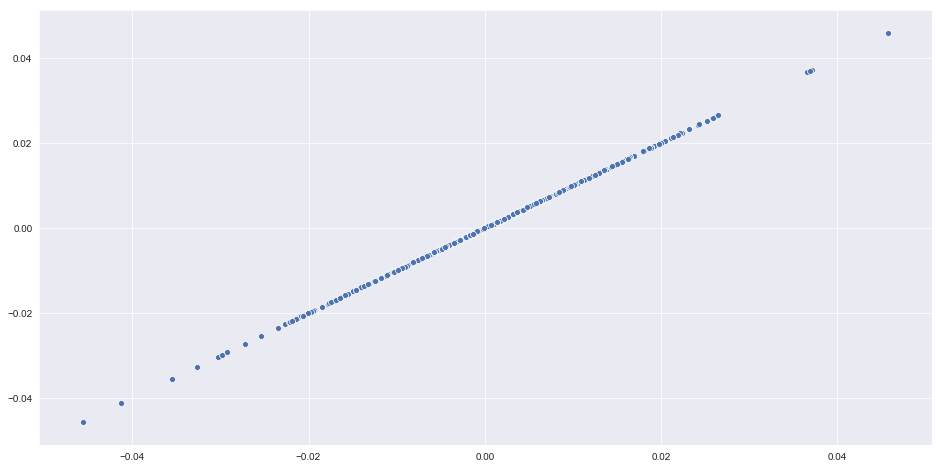

In [73]:
sns.scatterplot(log_returns, log_returns2)

Problem 12:
- Compute the returns and log returns and plot them to each other. Does it the two types return are seemly same?

In [25]:
data = [
    go.Scatter(
        x=returns,
        y=log_returns,
        mode="markers",
        marker = {
            'color':'green',
            'line':{
                'width': 10,   
            }
        }
    ),
    go.Scatter(
        x=returns,
        y=log_returns,
        mode="lines",
        marker = {
            'color':'red'
        }
    )
]
fig = go.Figure(data)
iplot(fig, filename="return-logreturns")

Yes, two type return are same

Problem 13:
- Compute the mean and the standard deviation for both the returns and the log returns. is it same?

In [13]:
mean_returns = np.mean(returns)
std_returns = np.std(returns)
mean_log_returns = np.mean(log_returns)
std_log_returns = np.std(log_returns)
print(f"different between mean of returns and log return {mean_returns-mean_log_returns:.6f}")
print(f"different between std of returns and log return {std_returns-std_log_returns:.6f}")

different between mean of returns and log return 0.000040
different between std of returns and log return -0.000001


In [14]:
st.ttest_ind(returns,log_returns, axis=0)

Ttest_indResult(statistic=0.1081345391988899, pvalue=0.9138982017637696)

In [15]:
st.ttest_rel(returns,log_returns, axis=0)

Ttest_relResult(statistic=15.865603933357201, pvalue=1.642607974463449e-51)

In [16]:
d = returns - log_returns
st.ttest_1samp(d,0.0)

Ttest_1sampResult(statistic=15.865603933357201, pvalue=1.642607974463449e-51)

Note: If returns is small so returns and log returns are interchageable

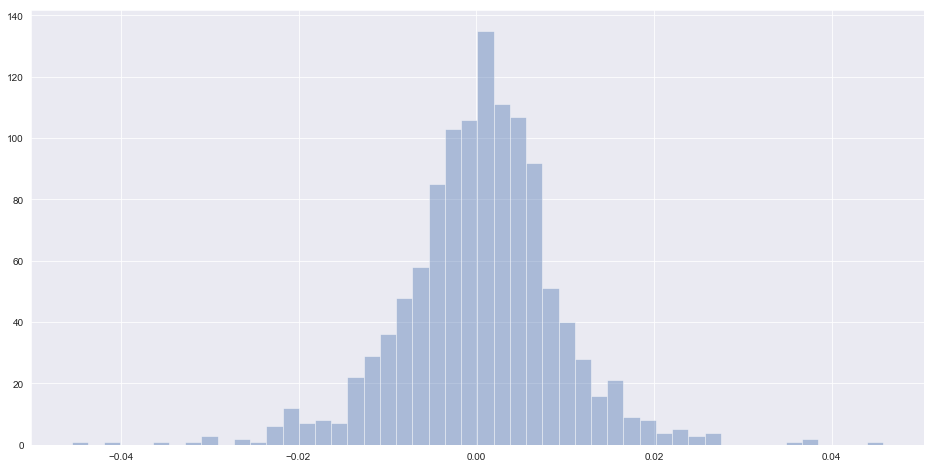

In [31]:
sns.distplot(log_returns, kde=False)

In [17]:
np.random.seed(2015)
m = np.mean(log_returns)
std = np.std(log_returns)
n_iters = 10000
n_bets = np.zeros(n_iters)
for i in range(n_iters):
    r = np.random.normal(loc=m,scale=std,size=20)
    Price = 93.07*np.exp(np.cumsum(r))
    ind = (np.min(Price) < 85)
    n_bets[i] = 100*ind - (1 - ind)
mu = np.mean(n_bets)
print(mu)

-0.0001


In [18]:
mu - np.sqrt((-mu*(1-mu))/n_iters)*st.norm.ppf(0.975,loc=m,scale=std)

-0.00010179030867001499

In [19]:
mu + np.sqrt((-mu*(1-mu))/n_iters)*st.norm.ppf(0.975,loc=m,scale=std)

-9.820969132998502e-05

In [20]:
np.random.seed(2015)
m = np.mean(log_returns)
std = np.std(log_returns)
n_iters = 10000
n_bets = np.zeros(n_iters)
for i in range(n_iters):
    r = np.random.normal(loc=m,scale=std,size=20)
    Price = 93.07*np.exp(np.cumsum(r))
    ind = (np.min(Price) < 84.5)
    n_bets[i] = 125*ind - (1 - ind)
mu = np.mean(n_bets)
print(mu)

-0.2566


In [21]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [22]:
m, down, up = mean_confidence_interval(n_bets)
m, up, down

(-0.2566, -0.06743796893192744, -0.44576203106807255)

# Execise:

In [23]:
# investment: 1000$
# log return have mean=0.1 and std=0.015
# log return have normal distribution and independent
# probability after 1 day the worth less than 990
n_iters = 10000
values = np.zeros(n_iters)
for i in range(n_iters):
    logr = st.norm.rvs(loc=0.001, scale=0.015, size=1)
    price = 1000*np.exp(logr)
    if price < 990:
        values[i] = 1
print(np.mean(values))

0.231


In [25]:
# probability after 5 day the worth less than 990
n_iters = 10000
values = np.zeros(n_iters)
for i in range(n_iters):
    logr = st.norm.rvs(loc=0.001, scale=0.015, size=5)
    price = 1000*np.exp(np.cumsum(logr))
    if np.min(price) < 990:
        values[i] = 1
print(np.mean(values))

0.5192


In [26]:
# yearly log return on a stock have a normal distribution with mean: 0.1 
# and standard deviation: 0.2. What probability after one year the stock 
# will be sell at 110$ or more, known stocks price is now 100$
n_iters = 10000
values = np.zeros(n_iters)
for i in range(n_iters):
    logr = st.norm.rvs(loc=0.1, scale=0.2, size=1)
    price = 100*np.exp(logr)
    if price >= 110:
        values[i] = 1
print(np.mean(values))

0.513


In [27]:
# yearly log return on a stock have a normal distribution with mean: 0.08 
# and standard deviation: 0.15. What probability after 2 year the stock 
# will be sell at 90$ or more, known stocks price is now 80$
n_iters = 10000
values = np.zeros(n_iters)
for i in range(n_iters):
    logr = st.norm.rvs(loc=0.08, scale=0.15, size=2)
    price = 80*np.exp(np.cumsum(logr))
    if price[-1] >= 90:
        values[i] = 1
print(np.mean(values))

0.5788


In [28]:
P = np.array([95,103,98])
t = [1,2,3]
r = P[1:]/P[0:-1]
r, np.log(1+r)
#r3(2) = log(1+R3(2)) = r3 + r2 = log(1 + R3) + log(1+ R2)=log(P3/P2)+log(P2/P1)
#R3(2) = P3/P1 - 1
print(f"{P[2]/P[0] - 1}")
np.sum(np.log(r))

0.03157894736842115


0.031090587070031143

In [30]:
P = [0,52,54,53,59]
D = [0,0.2,0.2,0.2,0.25]
print(f"R2: {(P[2]+D[2])/P[1] - 1}")
print(f"R4(3): {((P[4]+D[4])/P[3])*((P[3]+D[3])/P[2])*((P[2]+D[2])/P[1])}")
print(f"r3: {np.log((P[3]+D[3])/P[2])}")

R2: 0.04230769230769238
R4(3): 1.1479587969682312
r3: -0.014925650216675593


In [33]:
# rt is log return, r1,r2...are i.i.d N(0.06, 0.47)
# rt(4) = rt + rt-1 + rt-2 + rt-3 is i.i.d N(4*0.06, 4*0.47)
# P{r1(4)<2}?
print(f"P(r1(4)<2): {st.norm.cdf(2,loc=4*0.06,scale=np.sqrt(4*0.47))}")
# r2(1) = r2 and r2(2) = r2 + r1. Therefore, cov(r2(1), r2(2)) = var(r2) = 0.47
# rt(3) = rt + rt−1 + rt−2. Therefore, given rt−2 = 0.6, rt(3) is 
# N(􏰛0.6 + (2)(0.06), (2)(0.47))􏰜

P(r1(4)<2): 0.900361112462998


## Exo 8:

In [34]:
'''
Suppose that X1, X2, . . . is a lognormal geometric random walk with parameters
(μ, σ2). More specifically, suppose that Xk = X0 exp(r1 + · · · + rk), 
where X0 is a fixed constant and r1, r2, . . . are i.i.d. N(μ, σ2).
'''
# Find P(X2 >1.3X0) = P(X0*exp(r1+r2) > 1.3*X0) = P(exp(r1+r2)>1.3)
# = P(r1+r2 > log(1.3)) =  1 - P(r1+r2<log(1.3))
# r1+r2 = N(2*μ, 2*σ2)
# We can find P(X2 >1.3X0) by fonction cdf with loc=2*μ and scale= sqrt(2*σ2)
# a = log(1.3)

'\nSuppose that X1, X2, . . . is a lognormal geometric random walk with parameters\n(μ, σ2). More specifically, suppose that Xk = X0 exp(r1 + · · · + rk), \nwhere X0 is a fixed constant and r1, r2, . . . are i.i.d. N(μ, σ2).\n'

## Exo 9:

In [35]:
# μ = 0.1, σ = 0.2
# Find P(X3 > 1.2X0) = P(X0*exp(r1+r2+r3) > 1.2*X0) = P(r1+r2+r3>log(1.2))
print(f"P(X3 > 1.2X0): {1 - st.norm.cdf(np.log(1.2), loc=3*0.1, scale=0.2*np.sqrt(3))}")

P(X3 > 1.2X0): 0.6329619339826876


In [43]:
# Find the minimum number of days before the probability is at least 0.9 
# of doubling one’s money, that is, find the small value of t such that
# P(Pt/P0 ≥ 2) ≥ 0.9
# P(Pt/P0 ≥ 2) = P(log(Pt/P0) ≥ log(2)) = P(rt ≥ log(2)) ===== rt->N{0.1,0.2^2}
prob = []
for t in range(1,100):
    prob.append(1 - st.norm.cdf(np.log(2),loc=t*0.1,scale=np.sqrt(t)*0.2))
prob = np.array(prob)
np.where(prob>=0.9)
# begin the 18e day

(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),)

In [44]:
1000/(1+(20*0.06))

454.5454545454545

In [45]:
1000/np.exp(20*0.06)

301.1942119122021

In [46]:
1000/(20*0.06)

833.3333333333334